In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools



In [2]:
import numpy as np

# Import inputs and outputs
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')
print(outputs)

[0.6044327  0.56275307 0.00750324 0.0614243  0.2730468  0.08374657
 1.3649683  0.09264495 0.0178696  0.03356494 0.0735163  0.2063097
 0.00882563 0.26840032 0.61152553 0.01479818 0.27489251 0.06676325
 0.04211835 0.00270147 0.01820907 0.00701603 0.10050661 0.47539552
 0.67514163 0.51645722 0.00377748 0.00313433 0.02134252 0.09541116]


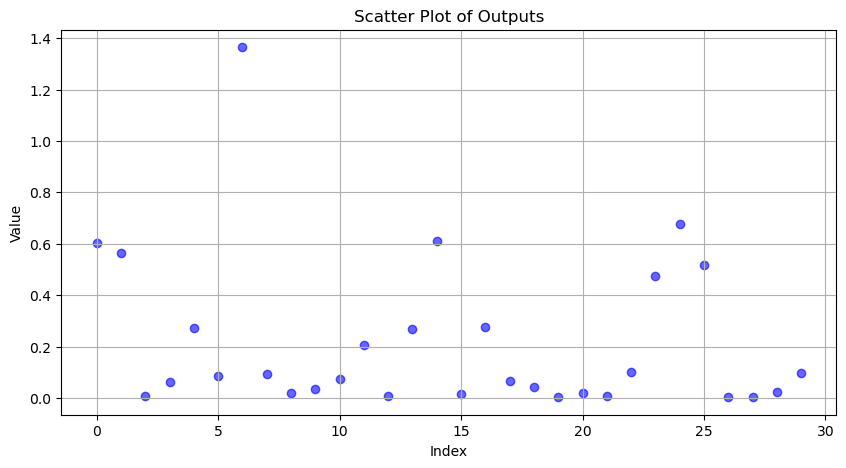

In [3]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot


In [5]:
#set up functions
import numpy as np

def generate_grid(n, resolution):
    num_points = int(1 / resolution) + 1
    grid = np.mgrid[[slice(0, 1, 1j*num_points) for _ in range(n)]]
    grid = grid.reshape(n, -1).T  # Reshape to have n columns
    return grid

def generate_binary_combinations(n):
    # Use itertools.product to generate combinations and convert to a NumPy array
    combinations = np.array(list(itertools.product([0, 1], repeat=n)))
    return combinations


In [6]:

# Number of dimensions
n = 6  
corners = generate_binary_combinations(n)

# Initial set of inputs using corners to force choice of points farther from the surface of the hypothesis space
initial_np = np.load('initial_inputs.npy')
initial_inputs = np.vstack([initial_np, corners])  # Append to the inputs
inputs = initial_inputs.copy()  # Start with the initial inputs

# Number of farthest points to find
num_far_points = 10

# Resolution for the grid
resolution = 0.05

# Generate initial grid
grid_points = generate_grid(n, resolution)

# List to store newly added farthest points
new_points = []

for _ in range(num_far_points):
    tree = KDTree(inputs)  # Create a KD-tree for the current inputs
    distances = tree.query(grid_points)[0]  # Find distances to nearest input points
    max_index = np.argmax(distances)  # Index of the farthest point
    farthest_point = grid_points[max_index]  # The farthest point

    # Find the nearest point in inputs to the farthest_point
    tree_initial = KDTree(inputs)
    nearest_dist, nearest_index = tree_initial.query(farthest_point)  # Get nearest
    nearest_point = inputs[nearest_index]

    # Calculate the midpoint
    new_point = (farthest_point + nearest_point) / 2

    # Append to the inputs and new_points
    inputs = np.vstack([inputs, new_point])
    new_points.append(new_point)
    formatted_point = ', '.join(f"{coord:.6f}" for coord in new_point)
    print(f"Added farthest point: [{formatted_point}]")




Added farthest point: [0.565109, 0.919048, 0.840007, 0.365948, 0.513368, 0.424215]
Added farthest point: [0.271501, 0.687347, 0.445784, 0.573243, 0.734220, 0.171566]
Added farthest point: [0.507554, 0.709524, 0.920003, 0.182974, 0.506684, 0.712107]
Added farthest point: [0.782554, 0.959524, 0.670003, 0.432974, 0.481684, 0.712107]
Added farthest point: [0.863143, 0.482448, 0.687285, 0.903623, 0.817719, 0.346709]
Added farthest point: [0.000000, 0.750000, 1.000000, 0.175000, 1.000000, 0.250000]
Added farthest point: [0.565109, 0.819048, 0.490007, 0.615948, 0.263368, 0.174215]
Added farthest point: [0.000000, 0.000000, 0.800000, 0.750000, 0.875000, 0.175000]
Added farthest point: [0.250000, 0.000000, 0.975000, 0.150000, 0.250000, 1.000000]
Added farthest point: [0.362989, 0.812208, 0.347771, 0.234776, 0.048885, 0.614071]


#### BEGIN SECOND PHASE - RUN FROM HERE

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools as it
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from brokenaxes import brokenaxes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [8]:
# Import inputs and outputs
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')
print(outputs)

[0.6044327  0.56275307 0.00750324 0.0614243  0.2730468  0.08374657
 1.3649683  0.09264495 0.0178696  0.03356494 0.0735163  0.2063097
 0.00882563 0.26840032 0.61152553 0.01479818 0.27489251 0.06676325
 0.04211835 0.00270147 0.01820907 0.00701603 0.10050661 0.47539552
 0.67514163 0.51645722 0.00377748 0.00313433 0.02134252 0.09541116]


In [9]:
new_inputs = np.array([[0.565109, 0.919048, 0.840007, 0.365948, 0.513368, 0.424215],[0.271501, 0.687347 ,0.445784, 0.573243, 0.73422,  0.171566],[0.507554, 0.709524 ,0.920003, 0.182974 ,0.506684 ,0.712107],[0.782554, 0.959524, 0.670003, 0.432974, 0.481684, 0.712107]])
new_outputs = np.array([0.21511504250318814, 1.3219168651763396, 0.24438551897404212, 0.052036579112222335])


In [10]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(outputs)

[0.6044327  0.56275307 0.00750324 0.0614243  0.2730468  0.08374657
 1.3649683  0.09264495 0.0178696  0.03356494 0.0735163  0.2063097
 0.00882563 0.26840032 0.61152553 0.01479818 0.27489251 0.06676325
 0.04211835 0.00270147 0.01820907 0.00701603 0.10050661 0.47539552
 0.67514163 0.51645722 0.00377748 0.00313433 0.02134252 0.09541116
 0.21511504 1.32191687 0.24438552 0.05203658]


#### Visualise New Outputs

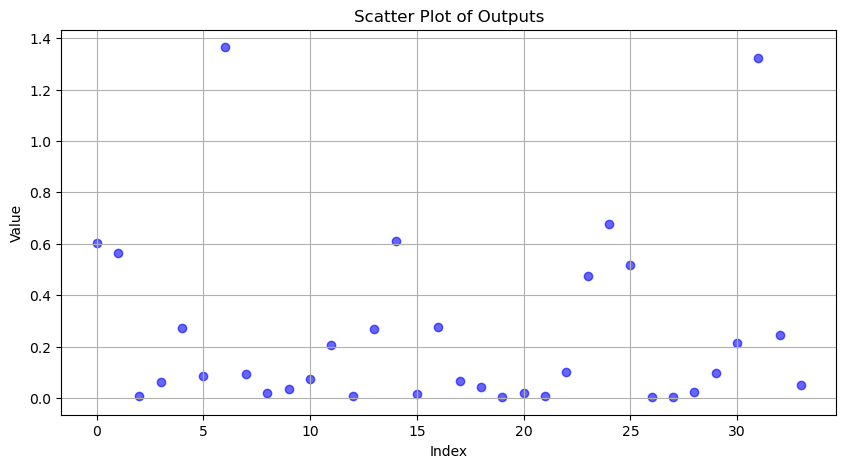

In [12]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [ ]:
# Set N number of dimenstions
N = 6

# Define the kernel
kernel = C(1.0, (1e-1, 1e2)) * RBF(1.0, (1e-1, 1e2))

# Create and train the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gpr.fit(inputs, outputs)

# Generate test points for N dimensions
num_test_points = 25
test_points = np.array(np.meshgrid(*[np.linspace(0, 1, num_test_points)] * N)).T.reshape(-1, N)

# Predict using the Gaussian Process
y_pred, sigma = gpr.predict(test_points, return_std=True)

# Calculate UCB
kappa = 1.96  # Exploration-exploitation trade-off parameter
ucb = y_pred + kappa * sigma

# Identify the optimal inputs
max_ucb_index = np.argmax(ucb)
optimal_input = test_points[max_ucb_index]

# Print the optimal inputs
print(f"Optimal inputs: {optimal_input}")
